# CS484 - Introduction to Computer Vision

# Homework 3 

Set True to save the figures.

In [1]:
save = False

Necessary library imports:

In [2]:
import numpy as np # scientific computing
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # reading images
from skimage.color import rgb2gray # converting rgb images to grayscale

## Part 1: Edge Detection

Read the given images, convert them to grayscale.

In [3]:
img1 = rgb2gray(mpimg.imread('edge1.png'))
img2 = rgb2gray(mpimg.imread('edge2.png'))
img3 = rgb2gray(mpimg.imread('edge3.png'))

Display the original images for reference.

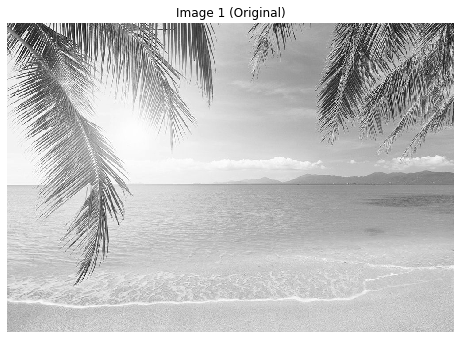

In [4]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Image 1 (Original)')
plt.imshow(img1, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()

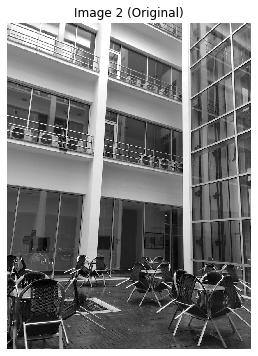

In [5]:
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.title('Image 2 (Original)')
plt.imshow(img2, cmap='gray')
if save:
    plt.savefig('original2.png')
plt.show()

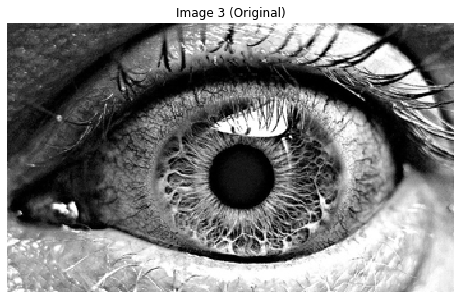

In [6]:
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Image 3 (Original)')
plt.imshow(img3, cmap='gray')
if save:
    plt.savefig('original3.png')
plt.show()

### 1.1: Edge Detection with Sobel and Prewitt Operators

Implement 2D-convolution (actually cross-correlation), to use as a helper in Prewitt and Sobel operator implementations.

In [7]:
def cross_correlate2D(img, mask):
    """
    Given an image and a mask of arbitrary sizes, performs 2D
    cross-correlation and returns the result.
    Args:
        img: The given image
        mask: The mask to cross-correlate
    Returns:
        result: The result of the 2D cross-correlation
    """
    num_r, num_c = img.shape
    # Compute row and column offsets
    mask_r, mask_c = mask.shape
    r_offset = mask_r // 2 - (mask_r % 2 == 0)
    c_offset = mask_c // 2 - (mask_c % 2 == 0)
    # Apply zero-padding 
    padded_img = np.pad(img, ((r_offset, r_offset + (mask_r % 2 == 0)),
                              (c_offset, c_offset + (mask_c % 2 == 0))))
    # Perform 2D cross-correlation
    result = np.zeros((num_r, num_c))
    for row in range(r_offset, r_offset + num_r):
        for col in range(c_offset, c_offset + num_c):
            result[row - r_offset, col - c_offset] = np.sum(
                mask *
                padded_img[row - r_offset: row + r_offset + (mask_r % 2 == 0) + 1, 
                           col - c_offset: col + c_offset + (mask_c % 2 == 0) + 1]
            )
    return result

Prewitt Operator implementation:

In [8]:
def prewitt(img):
    """
    Applies the Prewitt Operator to a given image, returns the vertical
    and horizontal edges, combined edges as gradient magnitudes, 
    and gradient directions. 
    Args:
        img The input image
    Returns:
        result_x: Vertical edges detected by the Prewitt Operator
        result_y: Horizontal edges detected by the Prewitt Operator
        gradient_magnitudes: The combined edges in terms of the gradient 
            magnitudes
        gradient_directions: The gradient directions  
    """
    mask_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    mask_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    result_x = cross_correlate2D(img, mask_x) / 6
    result_y = cross_correlate2D(img, mask_y) / 6
    gradient_magnitudes = np.sqrt(result_x ** 2 + result_y ** 2)
    gradient_magnitudes *= 255 / np.max(gradient_magnitudes) 
    gradient_directions = np.arctan2(result_y, result_x)
    return result_x, result_y, gradient_magnitudes, gradient_directions

Sobel Operator implementation:

In [9]:
def sobel(img):
    """
    Applies the Sobel Operator to a given image, returns the vertical
    and horizontal edges, combined edges as gradient magnitudes, 
    and gradient directions. 
    Args:
        img The input image
    Returns:
        result_x: Vertical edges detected by the Sobel Operator
        result_y: Horizontal edges detected by the Sobel Operator
        gradient_magnitudes: The combined edges in terms of the gradient 
            magnitudes
        gradient_directions: The gradient directions 
    """
    mask_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    mask_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    result_x = cross_correlate2D(img, mask_x) / 6
    result_y = cross_correlate2D(img, mask_y) / 6
    gradient_magnitudes = np.sqrt(result_x ** 2 + result_y ** 2)
    gradient_magnitudes *= 255 / np.max(gradient_magnitudes)
    gradient_directions = np.arctan2(result_y, result_x)
    return result_x, result_y, gradient_magnitudes, gradient_directions

Plotting code is refactored as a seperate function to avoid duplicate code.

In [10]:
def plot_results1(result1, result2, result3, result4, figsize_, method, img_number, save=False):
    fig, axs = plt.subplots(2, 2, figsize=figsize_)
    axs[0, 0].set_title('Vertical Edges after applying \n' + method + ' Operator to Image ' + img_number)
    axs[0, 0].axis('off')
    axs[0, 0].imshow(result1, cmap='gray')
    axs[0, 1].set_title('Horizontal Edges after applying \n' + method + ' Operator to Image ' + img_number)
    axs[0, 1].axis('off')
    axs[0, 1].imshow(result2, cmap='gray')
    axs[1, 0].set_title('Combined Edges of Image ' + img_number + '\n (Gradient Magnitudes (' + method + '))')
    axs[1, 0].axis('off')
    axs[1, 0].imshow(result3, cmap='gray')
    axs[1, 1].set_title('Gradient Directions (' + method + ') in Image ' + img_number)
    axs[1, 1].axis('off')
    axs[1, 1].imshow(result4)
    if save:
        plt.savefig(method + '_results' + img_number + '.png')
    plt.show()

Results of the Prewitt and Sobel Operators after being applied to the original images are computed and displayed below:

In [11]:
prewitt_x1, prewitt_y1, prewitt_magnitudes1, prewitt_directions1 = prewitt(img1)

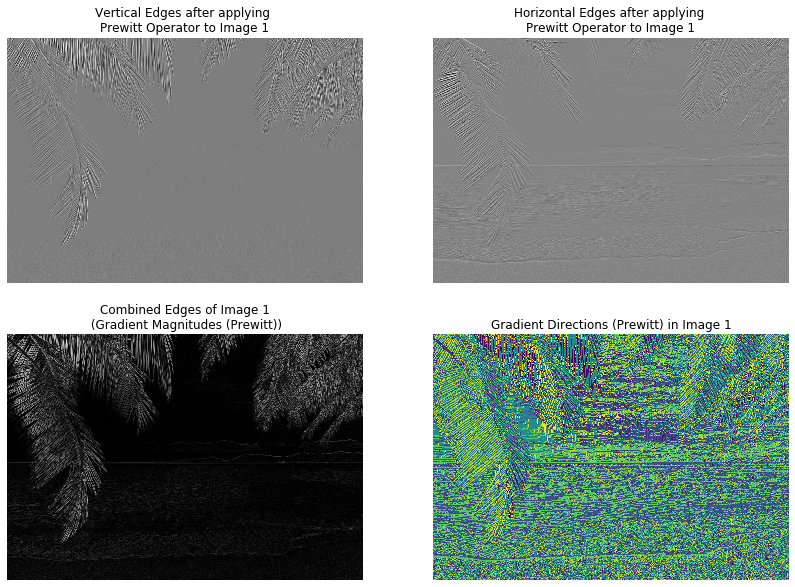

In [12]:
plot_results1(prewitt_x1, prewitt_y1, prewitt_magnitudes1, prewitt_directions1, (14, 10), 'Prewitt', '1', save)

In [13]:
prewitt_x2, prewitt_y2, prewitt_magnitudes2, prewitt_directions2 = prewitt(img2)

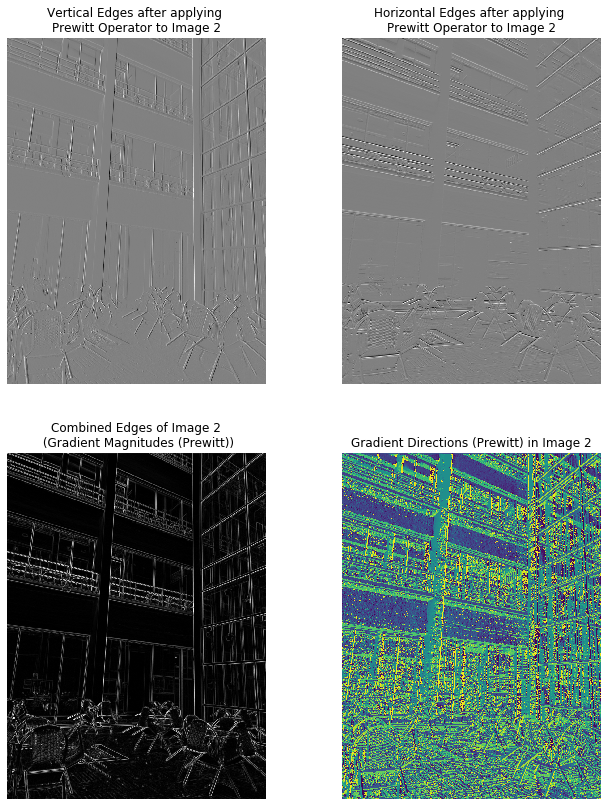

In [14]:
plot_results1(prewitt_x2, prewitt_y2, prewitt_magnitudes2, prewitt_directions2, (11, 14), 'Prewitt', '2', save)

In [15]:
prewitt_x3, prewitt_y3, prewitt_magnitudes3, prewitt_directions3 = prewitt(img3)

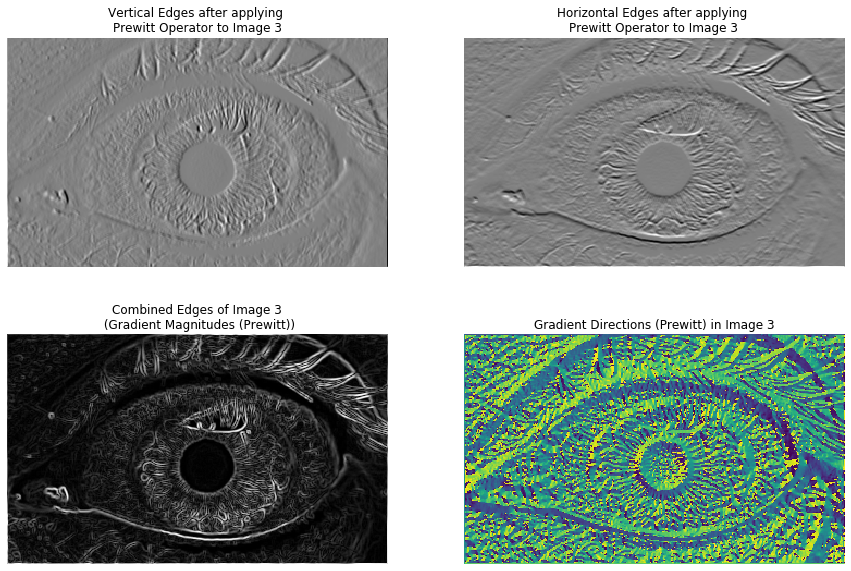

In [16]:
plot_results1(prewitt_x3, prewitt_y3, prewitt_magnitudes3, prewitt_directions3, (15, 10), 'Prewitt', '3', save)

In [17]:
sobel_x1, sobel_y1, sobel_magnitudes1, sobel_directions1 = sobel(img1)

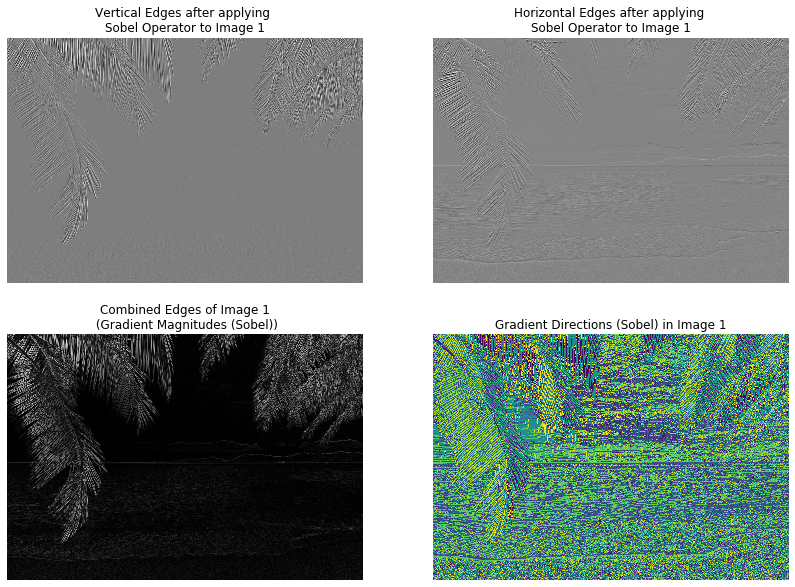

In [18]:
plot_results1(sobel_x1, sobel_y1, sobel_magnitudes1, sobel_directions1, (14, 10), 'Sobel', '1', save)

In [19]:
sobel_x2, sobel_y2, sobel_magnitudes2, sobel_directions2 = sobel(img2)

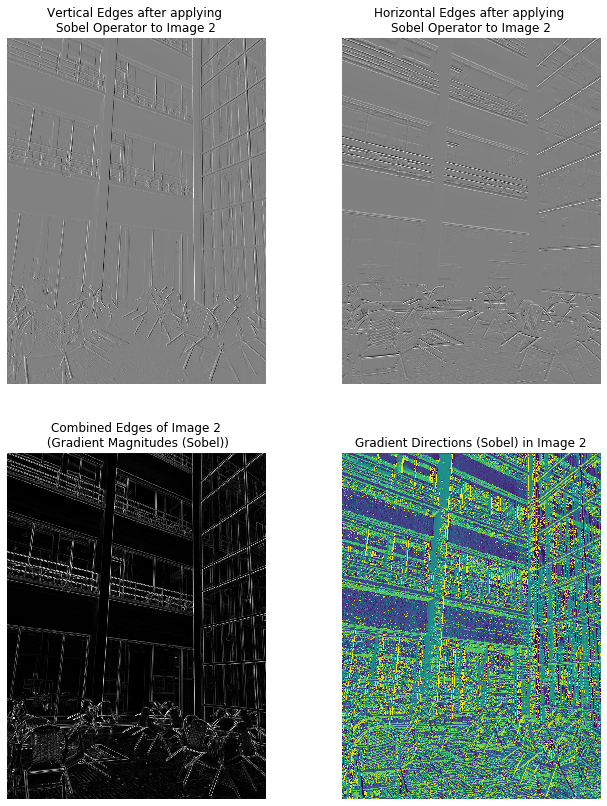

In [20]:
plot_results1(sobel_x2, sobel_y2, sobel_magnitudes2, sobel_directions2, (11, 14), 'Sobel', '2', save)

In [21]:
sobel_x3, sobel_y3, sobel_magnitudes3, sobel_directions3 = sobel(img3)

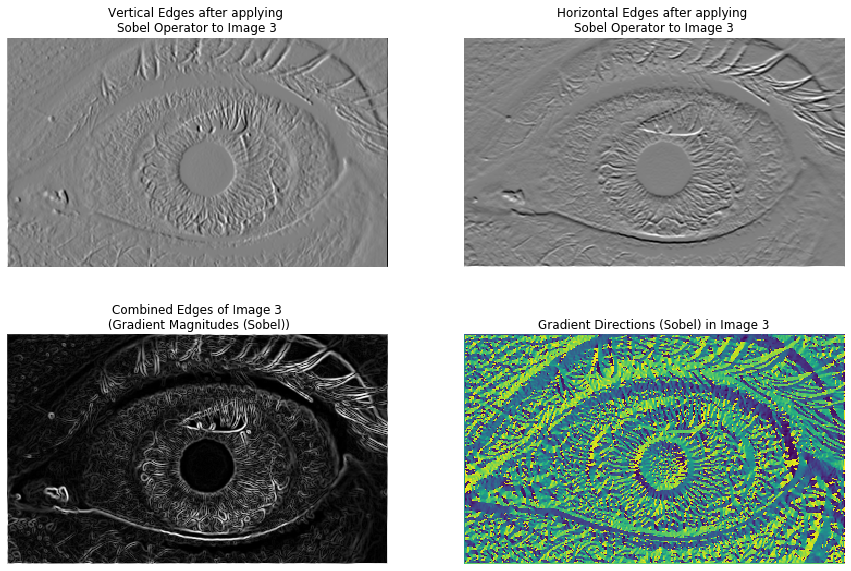

In [22]:
plot_results1(sobel_x3, sobel_y3, sobel_magnitudes3, sobel_directions3, (15, 10), 'Sobel', '3', save)

### 1.2: Edge Detection with Canny Edge Detector

**Step 1**: Apply Gaussian Blur to the image to reduce the existing noise.

In [23]:
def gaussian_blur(sigma, k=2):
    """
    Generates a Gaussian Blur Filter with shape (2k + 1, 2k + 1), with
    the specified standard deviation.
    Args:
        sigma: The standard deviation of the Gaussian Blur
        k: The parameter that determines the shape of the filter (2 by default)
    Returns:
        G: The resulting Gaussian Blur Filter 
    """
    x, y = np.mgrid[-k: k + 1, -k: k + 1]
    G = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2)) / 2 * np.pi * sigma ** 2
    return G

Plot a Gaussian Blur Filter of shape 11x11 and sigma 1 for illustration purposes

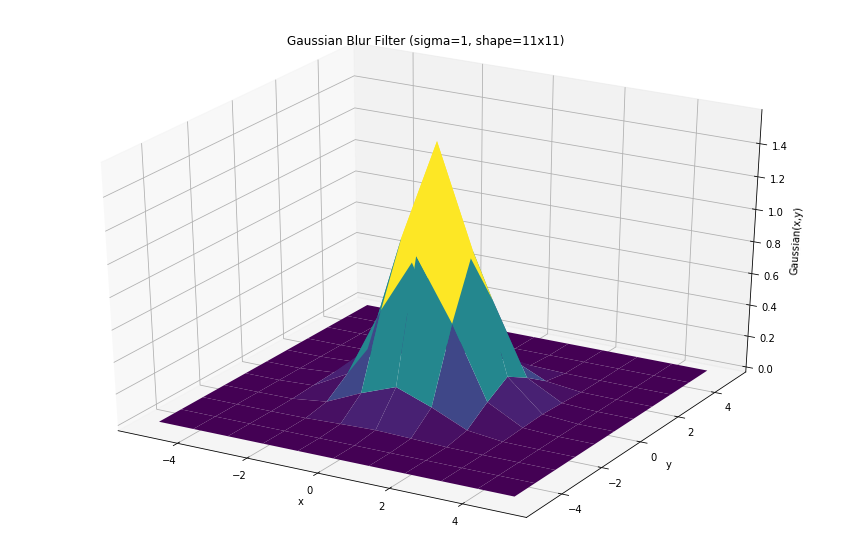

In [24]:
from mpl_toolkits import mplot3d # for 3D plotting

k_plt = 5
fig_3D = plt.figure(figsize=(15, 10))
ax_3D = plt.axes(projection='3d')
x_plt, y_plt = np.mgrid[-k_plt: k_plt + 1, -k_plt: k_plt + 1]
ax_3D.plot_surface(x_plt, y_plt, gaussian_blur(sigma=1, k=k_plt), rstride=1, cstride=1, 
                   cmap='viridis', edgecolor='none')
ax_3D.set_xlabel('x')
ax_3D.set_ylabel('y')
ax_3D.set_zlabel('Gaussian(x,y)')
plt.title('Gaussian Blur Filter (sigma=1, shape=11x11)')
#plt.savefig('gaussian_blur_3d.png')
plt.show()

**Step 2**: Gradient Calculation, we do not implement something new for this step since the **sobel** function implemented above can be used for computing the graident magnitudes and directions. 

**Step 3**: The third step is to thin out the detected edges using Non-Maximum Suppression algorithm, this helps us obtain clearer boundaries.

In [25]:
def non_max_suppression(gradient_magnitudes, gradient_directions):
    """
    Implements the Non-Maximum Suppression algorithm to thin out the
    edges described as gradient magnitudes.
    Args:
        gradient_magnitudes: Edge intensities
        gradient_directions: Edge directions (angles in Radians)
    Returns:
        result: The processed edge intensities 
    """
    num_rows, num_cols = gradient_magnitudes.shape
    result = np.zeros((num_rows, num_cols), dtype=np.int32)
    
    # Convert radians to angles
    gradient_angles = gradient_directions * 180 / np.pi
    # To only deal with angles between 0-180
    gradient_angles[gradient_angles < 0] += 180 
    
    for i in range(1, num_rows - 1):
        for j in range(1, num_cols - 1):
            
            intensity = gradient_magnitudes[i, j] # center's intensity
            angle = gradient_angles[i, j] # edge angle
            intensity1 = 255
            intensity2 = 255
            
            # angle 0 -> vertical line
            if 0 <= angle < 22.5 or 157.5 <= angle <= 180:
                intensity1 = gradient_magnitudes[i, j + 1]
                intensity2 = gradient_magnitudes[i, j - 1]
            
            # angle 45 -> diagonal line with positive slope
            elif 22.5 <= angle < 67.5:
                intensity1 = gradient_magnitudes[i + 1, j - 1]
                intensity2 = gradient_magnitudes[i - 1, j + 1]
            
            # angle 90 -> horizontal line
            elif 67.5 <= angle < 112.5:
                intensity1 = gradient_magnitudes[i + 1, j]
                intensity2 = gradient_magnitudes[i - 1, j]
            
            # angle 135 -> diagonal line with negative slope
            elif 112.5 <= angle < 157.5:
                intensity1 = gradient_magnitudes[i - 1, j - 1]
                intensity2 = gradient_magnitudes[i + 1, j + 1]

            if intensity >= intensity1 and intensity >= intensity2:
                result[i, j] = intensity
            else:
                result[i, j] = 0
    
    return result

**Step 4**: Double Thresholding to categorize pixels.

In [26]:
def double_threshold(img, ratio_low, ratio_high):
    """
    Categorizes the image pixels as strong, weak or non-relevant
    using double thresholding, returns the thresholded image.
    Args:
        img: The input image
        ratio_low: The low threshold ratio (default is 0.2)
        ratio_high: The high threshold ratio (default is 0.9)
    Returns:
        thresholded_img: The thresholded output
        weak: The intensity level of weak pixels
        strong: The intensity level of strong pixels
    """
    high = ratio_high * np.max(img)
    low = ratio_low * np.max(img)
    weak = 25
    strong = 255
    thresholded_img = np.zeros(img.shape)
    thresholded_img[np.where(img >= high)] = strong
    thresholded_img[np.where((img >= low) & (img < high))] = weak
    return thresholded_img, weak, strong

**Step 5**: Hysteresis, combines the Strong and Weak pixels and produces the final result. The rule of combining the pixel types is that a Weak pixel is turned into a Strong one if and only if there exists at least one Strong pixel in its 8-neighborhood, else it is considered Non-relevant. 

In [27]:
def hysteresis(img, weak, strong):
    """
    Combines the Strong and Weak pixels, the rule of combining the pixel types 
    is that a Weak pixel is turned into a Strong one if there is at least one 
    Strong pixel in its 8-neighborhood, else it is considered Non-relevant.
    Args:
        img: The input image
        weak: The weak intensity level
        strong: The strong intensity level
    Returns:
        result: The processed output image
    """
    num_rows, num_cols = img.shape
    weak_i, weak_j = np.where(img == weak)
    result = img.copy()
    for i, j in zip(weak_i, weak_j):
        if np.any(result[i - 1: i + 2, j - 1: j + 2] == strong):
            result[i, j] = strong
        else:
            result[i, j] = 0
    return result

Combine the five steps in a single algorithm:

In [28]:
def canny_edge_detector(img, sigma, ratio_low, ratio_high, k=2):
    """
    Applys Canny Edge Detection algorithm to a given image.
    Args:
        img: The input image
        sigma: The standard deviation of the 5x5 Gaussian Blur Filter
            used in the first step of the algorithm (default is 1)
        ratio_low: The low threshold ratio used in the Double Thresholding step
            (default is 0.02)
        ratio_high: The high threshold ratio used in the Double Thresholding step
            (default is 0.09)
        k: Parameter to adjust the shape of the (2k + 1, 2k + 1) gaussian blur 
    """
    G = gaussian_blur(sigma, k)
    blurred_img = cross_correlate2D(img, G)
    _, _, gradient_magnitudes, gradient_directions = sobel(blurred_img)
    non_max_suppressed_img = non_max_suppression(gradient_magnitudes, gradient_directions)
    thresholded_img, weak, strong = double_threshold(non_max_suppressed_img, ratio_low, ratio_high)
    result = hysteresis(thresholded_img, weak, strong)
    return result

Results of the Canny Edge Detector after being applied to the original images using four different combinations of function parameters are computed and displayed below:

In [29]:
def plot_results2(img_canny_results, params, figsize_, img_number, save=False):
    fig, axs = plt.subplots(2, 2, figsize=figsize_)
    for i in range(2):
        for j in range(2):
            k = 2 * i + j
            axs[i, j].set_title('Canny Edge Detection result for Image ' + img_number + 
                                '\n (sigma = ' + str(params[k][0]) + ', ratio_low = ' + 
                                str(params[k][1]) + ', ratio_high = ' + str(params[k][2]) +')')
            axs[i, j].axis('off')
            axs[i, j].imshow(img_canny_results[k], cmap='gray')
    if save:
        plt.savefig('canny_results' + img_number + '.png')
    plt.show()

In [30]:
params = [(1, 0.04, 0.09), (5, 0.02, 0.15), (10, 0.1, 0.2), (6, 0.1, 0.3)]

In [31]:
img1_canny_results = []
for i in range(4):
    img1_canny_results.append(
        canny_edge_detector(img1, sigma=params[i][0], ratio_low=params[i][1], ratio_high=params[i][2])
    )

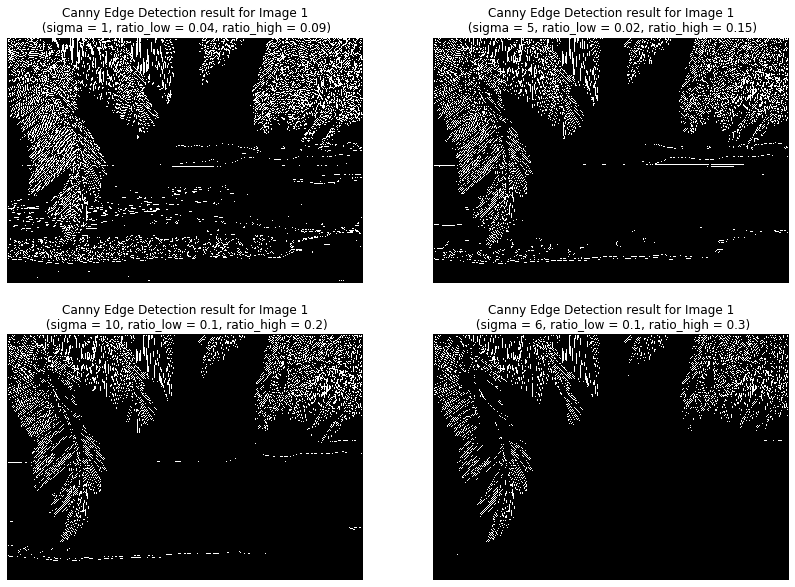

In [32]:
plot_results2(img1_canny_results, params, (14, 10), '1', save)

In [33]:
img2_canny_results = []
for i in range(4):
    img2_canny_results.append(
        canny_edge_detector(img2, sigma=params[i][0], ratio_low=params[i][1], ratio_high=params[i][2])
    )

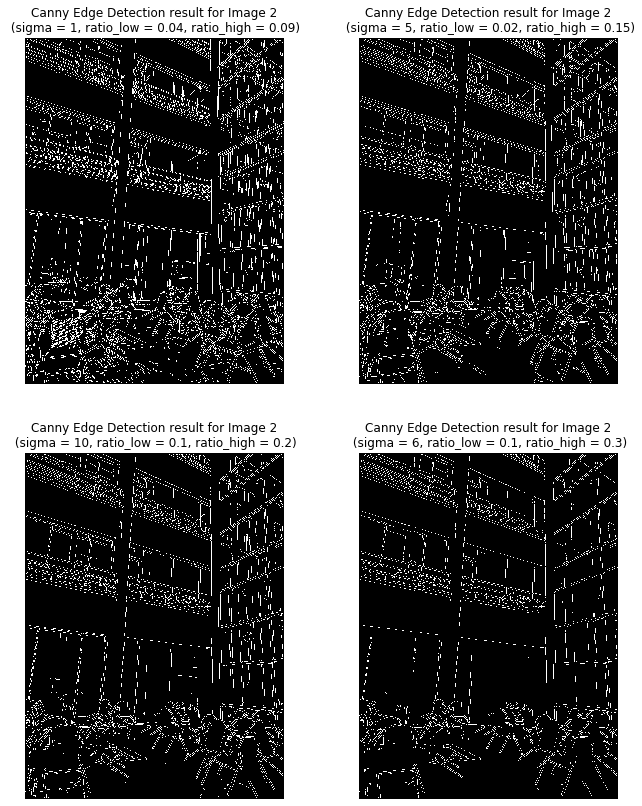

In [34]:
plot_results2(img2_canny_results, params, (11, 14), '2', save)

In [35]:
img3_canny_results = []
for i in range(4):
    img3_canny_results.append(
        canny_edge_detector(img3, sigma=params[i][0], ratio_low=params[i][1], ratio_high=params[i][2])
    )

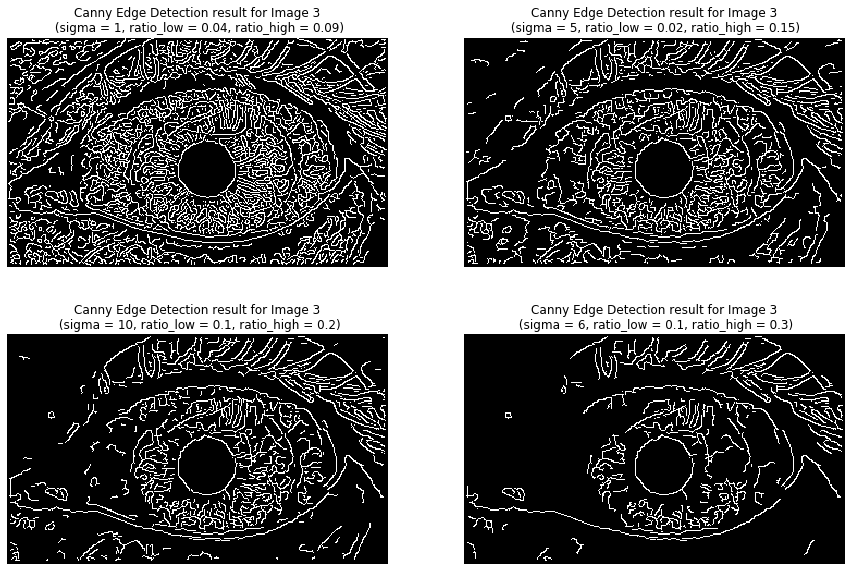

In [36]:
plot_results2(img3_canny_results, params, (15, 10), '3', save)

## Part 2: Edge Linking with Hough Transform

Hough Transform is a technique to extract particular features of an image. The technique requires the features to be representable in a certain parametric form, hence Hough Transform is typically used to detect geometric shapes such as lines and circles. In this part, we will focus on detecting lines with Hough Transform. The method below maps an image form image plane to Hough Space:

In [37]:
def hough_line_detection(binary_img, step_rho, step_theta):
    """
    Performs line detection on a binary edge image using Hough transform.
    Args:
        binary_img: The given binary edge image
        step_rho: The distance between discretized rho samples
        step_theta: The distance between discretized theta samples
    Returns:
        accumulator: The image in the discretized Hough Space
        rhos: The discretized rho values
        thetas: The discretized theta values
    """
    # Get the nonzero pixel indices
    y_idxs, x_idxs = np.nonzero(binary_img)
    
    # Find maximum possible value for rho
    hypots = np.sqrt(x_idxs ** 2 + y_idxs ** 2)
    rho_max = np.ceil(np.max(hypots))
    
    # Discretize rhos and thetas 
    rhos = np.arange(-rho_max, rho_max + step_rho, step_rho)
    thetas = np.deg2rad(np.arange(0, 180, step_theta))
    
    # Cache results for performance
    cos_vals = np.cos(thetas)
    sin_vals = np.sin(thetas)
    num_thetas = len(thetas)
    theta_idxs = np.arange(0, num_thetas)
    
    # Perform voting
    accumulator = np.zeros((len(rhos), num_thetas))
    for x, y in zip(x_idxs, y_idxs):
        rho_idxs = ((x * cos_vals + y * sin_vals + rho_max) // step_rho).astype(int)
        accumulator[rho_idxs, theta_idxs] += 1
        
    return accumulator, rhos, thetas

The method below implements basic trigonometry to map the lines from Hough Space back to the image plane

In [38]:
def get_best_lines(accumulator, rhos, thetas, threshold):
    """
    Given an image in hough space, and the rho and theta axes finds the 
    image plane parameters for the lines that are voted above a threshold.
    Args:
        accumulator: The image in the discretized Hough Space
        rhos: The discretized rho values
        thetas: The discretized theta values
    Returns: 
        best_lines: The image plane parameters of the most-voted lines
    """
    rho_idx, theta_idx = np.where(accumulator >= threshold)
    rho_best = rhos[rho_idx]
    theta_best = thetas[theta_idx]
    best_lines = []
    for rho, theta in zip(rho_best, theta_best):
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        x0 = rho * cos_theta
        y0 = rho * sin_theta
        x1 = int(x0 - 1000 * sin_theta)
        y1 = int(y0 + 1000 * cos_theta)
        x2 = int(x0 + 1000 * sin_theta)
        y2 = int(y0 - 1000 * cos_theta)
        best_lines.append((x1, y1, x2, y2))
    return best_lines

### Hough Line Detection Applied to 'hough.png'

In [39]:
hough_img1 = rgb2gray(mpimg.imread('hough.png'))

In [40]:
accumulator1, rhos1, thetas1 = hough_line_detection(hough_img1, step_rho=0.5, step_theta=0.125)

In [41]:
threshold1 = 50

In [42]:
best_lines1 = get_best_lines(accumulator1, rhos1, thetas1, threshold1)

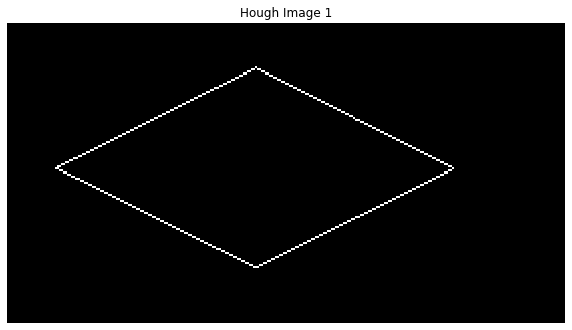

In [43]:
plt.figure(figsize=(10, 10))
plt.title('Hough Image 1')
plt.imshow(hough_img1, cmap='gray')
plt.axis('off')
#plt.savefig('org1.png')
plt.show()

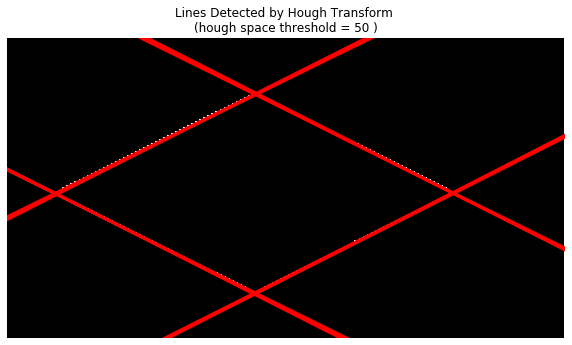

In [44]:
plt.figure(figsize=(10, 10))
plt.title('Lines Detected by Hough Transform \n' + 
          '(hough space threshold = ' + str(threshold1) + ' )')
plt.imshow(hough_img1, cmap='gray')
for line in best_lines1:
    plt.plot([line[0], line[2]], [line[1], line[3]], linewidth=2, color='r')
plt.xlim((0, hough_img1.shape[1]))
plt.ylim((0, hough_img1.shape[0]))
plt.axis('off')
if save:
    plt.savefig('hough_result1.png')
plt.show()

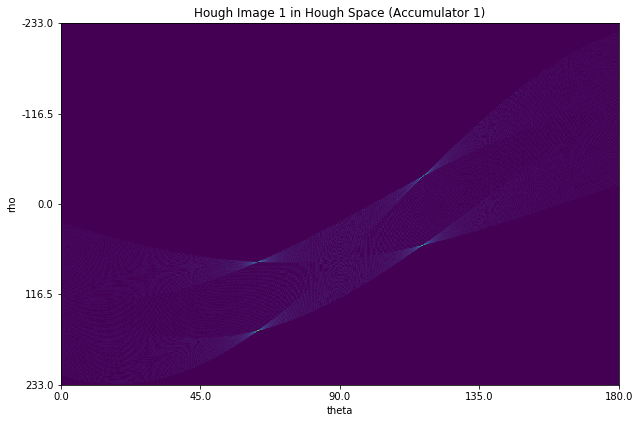

In [45]:
plt.figure(figsize=(10, 10))
plt.imshow(accumulator1)
plt.title('Hough Image 1 in Hough Space (Accumulator 1)')
plt.xlabel('theta')
plt.ylabel('rho')
plt.xticks(np.linspace(0, accumulator1.shape[1], 5), np.linspace(0, 180, 5))
plt.yticks(np.linspace(0, accumulator1.shape[0], 5), np.linspace(rhos1[0], rhos1[-1], 5))
if save:
    plt.savefig('accumulator1.png')
plt.show()

### Hough Line Detection Applied to 'hough2.png'

In [46]:
hough_img2 = rgb2gray(mpimg.imread('hough2.png'))

In [47]:
binary_img2 = canny_edge_detector(hough_img2, sigma=5, ratio_low=0.15, ratio_high=0.5)

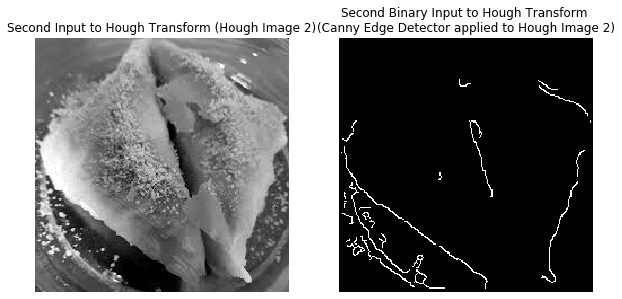

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].set_title('Second Input to Hough Transform (Hough Image 2)')
axs[0].imshow(hough_img2, cmap='gray')
axs[0].axis('off')
axs[1].set_title('Second Binary Input to Hough Transform \n' + 
                 '(Canny Edge Detector applied to Hough Image 2)')
axs[1].imshow(binary_img2, cmap='gray')
axs[1].axis('off')
if save:
    plt.savefig('org2.png')
plt.show()

In [49]:
accumulator2, rhos2, thetas2 = hough_line_detection(binary_img2, step_rho=0.5, step_theta=0.125)

In [50]:
threshold2 = int(np.floor(accumulator2.max() * 0.5))

In [51]:
best_lines2 = get_best_lines(accumulator2, rhos2, thetas2, threshold2)

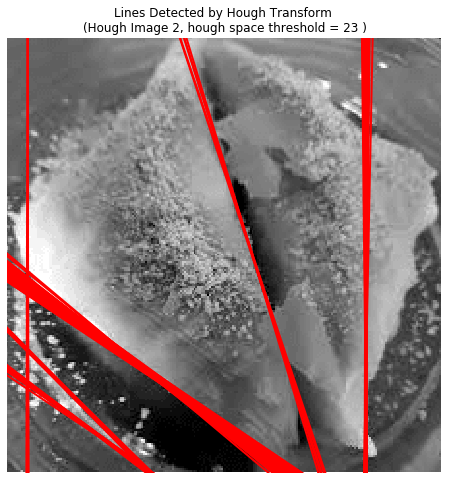

In [52]:
plt.figure(figsize=(8, 8))
plt.title('Lines Detected by Hough Transform \n' + 
          '(Hough Image 2, hough space threshold = ' + str(threshold2) + ' )')
plt.imshow(hough_img2, cmap='gray')
for line in best_lines2:
    plt.plot([line[0], line[2]], [line[1], line[3]], linewidth=2, color='r')
plt.xlim((0, hough_img2.shape[1]))
plt.ylim((0, hough_img2.shape[0]))
plt.axis('off')
plt.gca().invert_yaxis()
if save:
    plt.savefig('hough_result2.png')
plt.show()

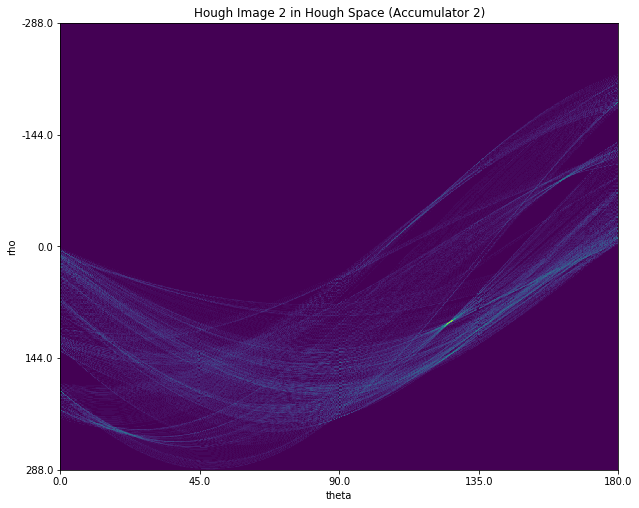

In [53]:
plt.figure(figsize=(10, 10))
plt.imshow(accumulator2)
plt.title('Hough Image 2 in Hough Space (Accumulator 2)')
plt.xlabel('theta')
plt.ylabel('rho')
plt.xticks(np.linspace(0, accumulator2.shape[1], 5), np.linspace(0, 180, 5))
plt.yticks(np.linspace(0, accumulator2.shape[0], 5), np.linspace(rhos2[0], rhos2[-1], 5))
if save:
    plt.savefig('accumulator2.png')
plt.show()

### Hough Line Detection Applied to 'hough3.png'

In [54]:
hough_img3 = rgb2gray(mpimg.imread('hough3.png'))

In [55]:
binary_img3 = canny_edge_detector(hough_img3, sigma=10, k=10, ratio_low=0.05, ratio_high=0.15)

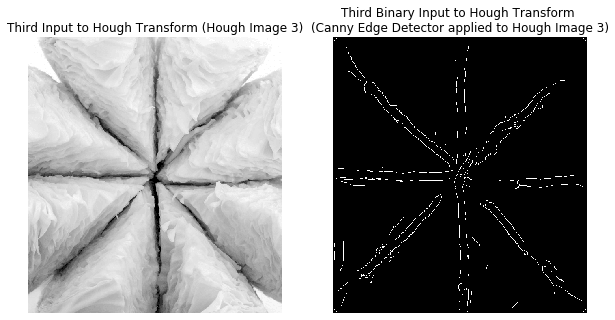

In [56]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].set_title('Third Input to Hough Transform (Hough Image 3)')
axs[0].imshow(hough_img3, cmap='gray')
axs[0].axis('off')
axs[1].set_title('Third Binary Input to Hough Transform \n' + 
                 '(Canny Edge Detector applied to Hough Image 3)')
axs[1].imshow(binary_img3, cmap='gray')
axs[1].axis('off')
if save:
    plt.savefig('org3.png')
plt.show()

In [57]:
accumulator3, rhos3, thetas3 = hough_line_detection(binary_img3, step_rho=1, step_theta=0.25)

In [58]:
threshold3 = int(np.floor(accumulator3.max() * 0.77))

In [59]:
best_lines3 = get_best_lines(accumulator3, rhos3, thetas3, threshold3)

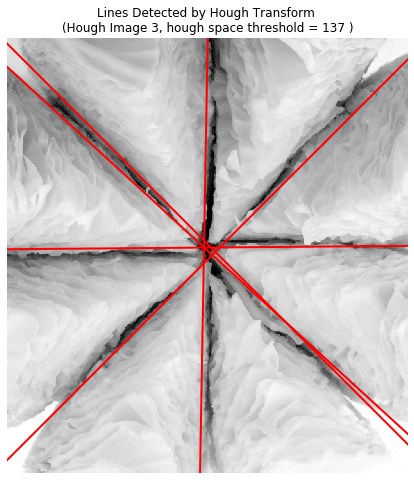

In [60]:
plt.figure(figsize=(8, 8))
plt.title('Lines Detected by Hough Transform \n' + 
          '(Hough Image 3, hough space threshold = ' + str(threshold3) + ' )')
plt.imshow(hough_img3, cmap='gray')
for line in best_lines3:
    plt.plot([line[0], line[2]], [line[1], line[3]], linewidth=2, color='r')
plt.xlim((0, hough_img3.shape[1]))
plt.ylim((0, hough_img3.shape[0]))
plt.axis('off')
if save:
    plt.savefig('hough_result3.png')
plt.show()

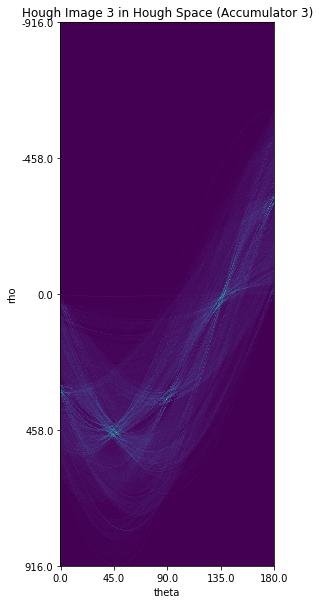

In [61]:
plt.figure(figsize=(10, 10))
plt.imshow(accumulator3)
plt.title('Hough Image 3 in Hough Space (Accumulator 3)')
plt.xlabel('theta')
plt.ylabel('rho')
plt.xticks(np.linspace(0, accumulator3.shape[1], 5), np.linspace(0, 180, 5))
plt.yticks(np.linspace(0, accumulator3.shape[0], 5), np.linspace(rhos3[0], rhos3[-1], 5))
if save:
    plt.savefig('accumulator3.png')
plt.show()

### Hough Line Detection Applied to 'edge1.png'

In [62]:
binary_img4 = img1_canny_results[1]

In [63]:
accumulator4, rhos4, thetas4 = hough_line_detection(binary_img4, step_rho=1, step_theta=0.1)

In [64]:
threshold4 = int(np.floor(accumulator4.max() * 0.8))

In [65]:
best_lines4 = get_best_lines(accumulator4, rhos4, thetas4, threshold4)

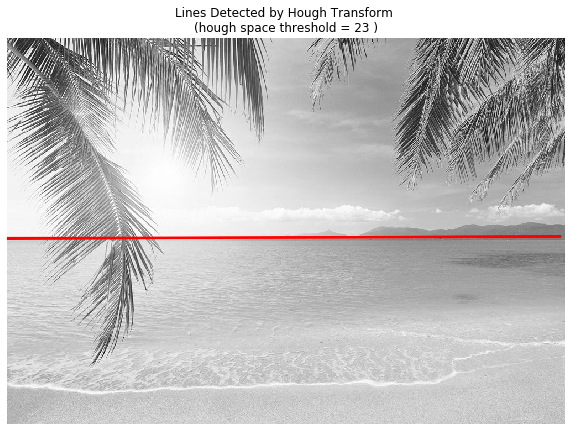

In [66]:
plt.figure(figsize=(10, 10))
plt.title('Lines Detected by Hough Transform \n' + 
          '(hough space threshold = ' + str(threshold2) + ' )')
plt.imshow(img1, cmap='gray')
for line in best_lines4:
    plt.plot([line[0], line[2]], [line[1], line[3]], linewidth=2, color='r')
plt.xlim((0, binary_img4.shape[1]))
plt.ylim((0, binary_img4.shape[0]))
plt.axis('off')
plt.gca().invert_yaxis()
if save:
    plt.savefig('hough_result4.png')
plt.show()

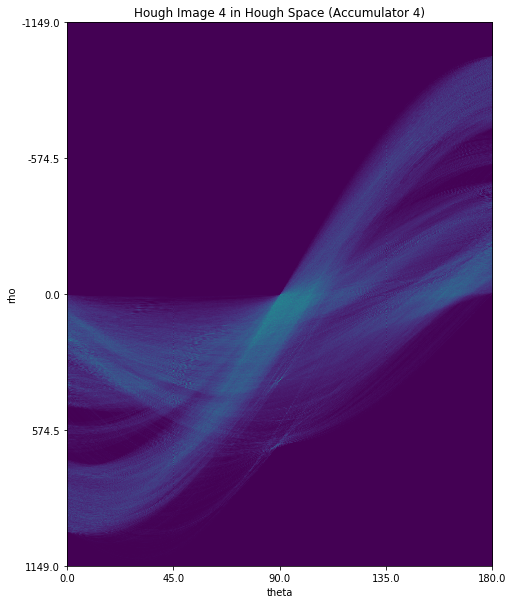

In [67]:
plt.figure(figsize=(10, 10))
plt.imshow(accumulator4)
plt.title('Hough Image 4 in Hough Space (Accumulator 4)')
plt.xlabel('theta')
plt.ylabel('rho')
plt.xticks(np.linspace(0, accumulator4.shape[1], 5), np.linspace(0, 180, 5))
plt.yticks(np.linspace(0, accumulator4.shape[0], 5), np.linspace(rhos4[0], rhos4[-1], 5))
if save:
    plt.savefig('accumulator4.png')
plt.show()